# Computational Thermofluid Dynamics - Chapter 6

Technical University of Munich, Professur für Thermofluiddynamik - Pr. Polifke


Created: 12/2024 | J. Yao, N. Garcia, G. Varillon

Revised: 12/2025 | A. Keles

==============================================================================================


# Stage 1 - Numerical Integration
Before implementing Green’s functions, it is useful first to refresh our minds about numerical integration with the function trapezoid. Perform $\int_0^2 xdx$ and $\int_0^2\int_0^2\cos(x_s)\sin(y_s)dx_sdy_s$ and print the result. use 1000 point

In [16]:
import numpy as np 

def f(x):
    return x

x = np.linspace(0, 2, 1000)
y = f(x)

result_1q = np.trapezoid(y, x)

# Your solution

print(f"Result of the first question (1D): {result_1q}")


def g(x, y):
    return np.cos(x) * np.sin(y)

# domains for x_s and y_s with 1000 points
xs = np.linspace(0, 2, 1000)
ys = np.linspace(0, 2, 1000)

# Create a meshgrid to evaluate g(x,y) over the 2D area
X, Y = np.meshgrid(xs, ys)
Z = g(X, Y)

# Integrate Z along the x-axis (axis=1), resulting in a 1D array
int_x = np.trapezoid(Z, xs, axis=1)

# Integrate the result along the y-axis
result_2q = np.trapezoid(int_x, ys)

# Your solution
print(f"Result of the first question (2D): {result_2q:.4f}")

Result of the first question (1D): 2.0
Result of the first question (2D): 1.2877


# Stage 2 – 1D Green Function

In this stage we construct the 1D Green’s function for the 1D steady heat equation using eigenfunction expansion.

For boundary case **X11 (Dirichlet–Dirichlet)**:

$$
X_m(x) = \sin\left(\frac{m\pi x}{L}\right),
\qquad
\beta_m = \frac{m\pi}{L},
\qquad
N_x = \frac{L}{2}.
$$

The truncated Green’s function is

$$
G_{1D}(x \mid x_s)
=
\sum_{m=1}^{M}
\frac{
X_m(x)\,X_m(x_s)
}{
N_x\,\beta_m^2
}.
$$

**Tasks:**

1. Implement $X_m(x)$, $\beta_m$, and $N_x$.
2. Implement $G_{1D}(x \mid x_s)$ with $M = 50$.
3. Evaluate and plot the function for $x_s = 0.25L,\ 0.5L,\ 0.75L$.


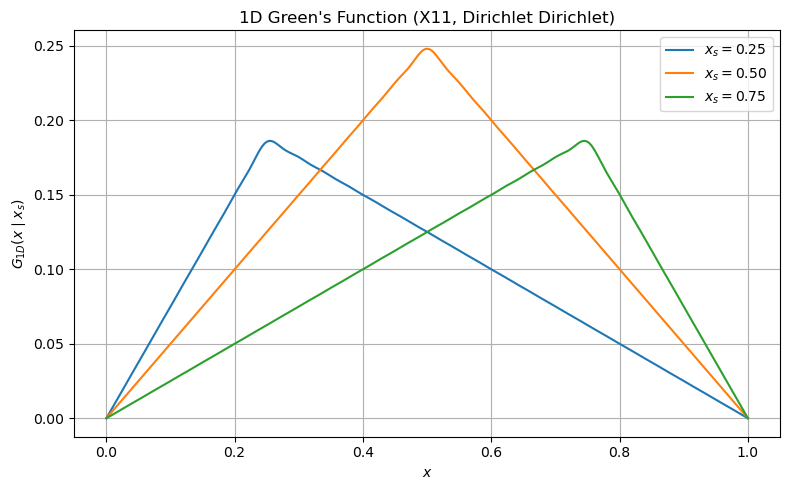

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Domain length
L = 1.0

def X_m(m, x, L):
    return np.sin(m * np.pi * x / L)

def beta_m(m, L):
    return m * np.pi / L

def Nx(L):
    return L / 2.0

def G_1D(x, xs, L, M=50):
    """
    Compute truncated 1D Green's function G_1D(x | xs)
    for X11 boundary conditions with M modes.
    x  : observation points (array)
    xs : source location (scalar)
    """
    G = np.zeros_like(x)

    N = Nx(L)

    for m in range(1, M+1):     # Eigenvalue
        beta = beta_m(m, L)
                
        X_product = X_m(m, x, L) * X_m(m, xs, L)    # Eigenfunction product
                
        G += X_product / (N * beta**2)      # Adding the contribution from this mode
    return G

    
# Discretize x
x = np.linspace(0, L, 500)

# Source locations
xs_list = [0.25 * L, 0.5 * L, 0.75 * L]

plt.figure(figsize=(8, 5))

for xs in xs_list:
    G_vals = G_1D(x, xs, L, M=50)
    plt.plot(x, G_vals, label=fr"$x_s = {xs:.2f}$")

plt.xlabel(r"$x$")
plt.ylabel(r"$G_{1D}(x \mid x_s)$")
plt.title("1D Green's Function (X11, Dirichlet Dirichlet)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Stage 3 – 2D Green Function (X11 and X12 Cases)

In this stage you will construct the 2D Green’s function
$$
G(x,y \mid x_s,y_s)
$$
for two different sets of boundary conditions: **X11** (Dirichlet–Dirichlet) and **X12** (Dirichlet–Neumann).

---

### Domain Setup

Use a rectangular domain  
$$
0 \le x \le L_x,\qquad 0 \le y \le L_y,
$$  
with  
$$
L_x = 1,\qquad L_y = 1.
$$

Discretize the domain into a mesh:
$$
x = \text{linspace}(0, L_x, N_x),\qquad
y = \text{linspace}(0, L_y, N_y).
$$

Use  
$$
N_x = N_y = 100.
$$

---

### Source Location

Choose a **single point source** (delta source) located at

$$
(x_s, y_s) = (0.5,\; 0.5).
$$

This point is used inside $G(x,y\mid x_s,y_s)$.

---

### Green Function Form

The 2D Green’s function is given by the mode expansion

$$
G(x,y \mid x_s,y_s)
=
\sum_{m=1}^{M}\sum_{n=1}^{N}
\frac{
X_m(x)\,X_m(x_s)\,
Y_n(y)\,Y_n(y_s)
}{
N_x N_y \left(\beta_m^2 + \theta_n^2\right)}.
$$

Use  
$$
M = N = 30.
$$

---

### X11 Case (Dirichlet–Dirichlet)

Eigenfunctions:
$$
X_m(x)=\sin\left(\frac{m\pi x}{L_x}\right),
\qquad
Y_n(y)=\sin\left(\frac{n\pi y}{L_y}\right).
$$

Eigenvalues:
$$
\beta_m=\frac{m\pi}{L_x},\qquad
\theta_n=\frac{n\pi}{L_y}.
$$

Normalization:
$$
N_x = \frac{L_x}{2},\qquad
N_y = \frac{L_y}{2}.
$$

---

### X12 Case (Dirichlet–Neumann)

Eigenfunctions:
$$
X_m(x)=\sin\left(\frac{(2m-1)\pi x}{2L_x}\right),
\qquad
Y_n(y)=\sin\left(\frac{(2n-1)\pi y}{2L_y}\right).
$$

Eigenvalues:
$$
\beta_m=\frac{(2m-1)\pi}{2L_x},\qquad
\theta_n=\frac{(2n-1)\pi}{2L_y}.
$$

Normalization remains:
$$
N_x = \frac{L_x}{2},\qquad
N_y = \frac{L_y}{2}.
$$

---

### Tasks

1. Implement eigenfunctions and eigenvalues for **both X11 and X12**.  
2. Construct  
   - $G_{11}(x,y\mid x_s,y_s)$  
   - $G_{12}(x,y\mid x_s,y_s)$  
   using the series above.  
3. Evaluate both Green functions on the $(x,y)$ grid.  
4. Produce two plots:  
   - 2D Green function for X11  
   - 2D Green function for X12  
5. Compare the shapes of the two Green functions.

---


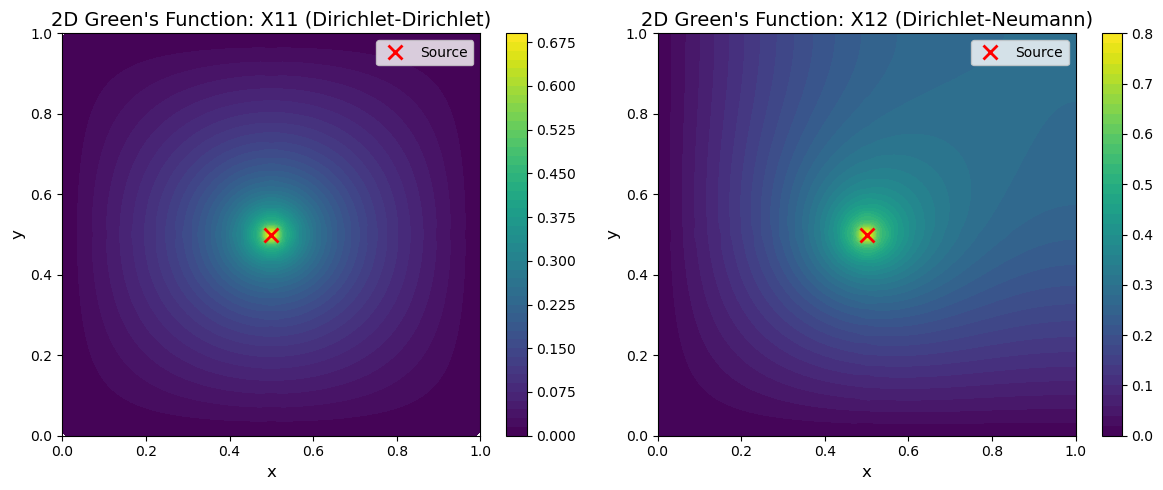

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Domain and mesh
# -------------------------------
Lx, Ly = 1.0, 1.0
Nx, Ny = 100, 100

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Source point (single point)
xs, ys = 0.5, 0.5


# -------------------------------
# X11 CASE (Dirichlet–Dirichlet)
# -------------------------------

def Xm_11(m, x, L):
    return np.sin(m * np.pi * x / L)

def beta_11(m, L):
    return m * np.pi / L

Nx_norm = Lx / 2.0
Ny_norm = Ly / 2.0


def G_2D_X11(X, Y, xs, ys, Lx, Ly, M=50, N=50):
    G = np.zeros_like(X)
    
    for m in range(1, M+1):         # X eigenfunction and eigenvalue
        X_m_val = Xm_11(m, X, Lx)
        X_m_s = Xm_11(m, xs, Lx)
        beta_m = beta_11(m, Lx)
        
        for n in range(1, N+1):     # Y eigenfunction and eigenvalue
            Y_n_val = Xm_11(n, Y, Ly)
            Y_n_s = Xm_11(n, ys, Ly)
            theta_n = beta_11(n, Ly)
            
            # Denominator
            denominator = Nx_norm * Ny_norm * (beta_m**2 + theta_n**2)
            
            # Add contribution
            G += (X_m_val * X_m_s * Y_n_val * Y_n_s) / denominator
    
    return G

    #return

# -------------------------------
# X12 CASE (Dirichlet–Neumann)
# -------------------------------

def Xm_12(m, x, L):
    return np.sin((2*m - 1) * np.pi * x / (2 * L))

def beta_12(m, L):
    return (2*m - 1) * np.pi / (2 * L)

Nx_norm_12 = Lx / 2.0
Ny_norm_12 = Ly / 2.0


def G_2D_X12(X, Y, xs, ys, Lx, Ly, M=50, N=50):
    
    G = np.zeros_like(X)
    
    for m in range(1, M+1):
        # X eigenfunction and eigenvalue
        X_m_val = Xm_12(m, X, Lx)
        X_m_s = Xm_12(m, xs, Lx)
        beta_m = beta_12(m, Lx)
        
        for n in range(1, N+1):
            # Y eigenfunction and eigenvalue
            Y_n_val = Xm_12(n, Y, Ly)
            Y_n_s = Xm_12(n, ys, Ly)
            theta_n = beta_12(n, Ly)
            
            # Denominator
            denominator = Nx_norm_12 * Ny_norm_12 * (beta_m**2 + theta_n**2)
            
            # Add contribution
            G += (X_m_val * X_m_s * Y_n_val * Y_n_s) / denominator
    
    return G

    #return



# -------------------------------
# Compute both Green functions
# -------------------------------
G11 = G_2D_X11(X, Y, xs, ys, Lx, Ly)
G12 = G_2D_X12(X, Y, xs, ys, Lx, Ly)


# -------------------------------
# Plot results
# -------------------------------

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot X11 case
im1 = axes[0].contourf(X, Y, G11, levels=50, cmap='viridis')
axes[0].plot(xs, ys, 'rx', markersize=10, markeredgewidth=2, label='Source')
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('y', fontsize=12)
axes[0].set_title('2D Green\'s Function: X11 (Dirichlet-Dirichlet)', fontsize=14)
axes[0].legend()
plt.colorbar(im1, ax=axes[0])

# Plot X12 case
im2 = axes[1].contourf(X, Y, G12, levels=50, cmap='viridis')
axes[1].plot(xs, ys, 'rx', markersize=10, markeredgewidth=2, label='Source')
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('y', fontsize=12)
axes[1].set_title('2D Green\'s Function: X12 (Dirichlet-Neumann)', fontsize=14)
axes[1].legend()
plt.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()

# Stage 4 – Superposition: Finite Difference + Green’s Function (Point Source)

In this stage we compute the full temperature field by combining:

1. A **homogeneous solution** from the finite-difference solver:
   $$
   -\nabla^2 T_h = 0 \qquad \text{with boundary conditions}
   $$

2. A **particular solution** due to a *point source* of strength \(q\) located at  
   $$
   (x_s, y_s) = (0.5,\,0.5).
   $$

   From Stage 3, the Green’s function for a point source gives:
   $$
   T_p(x,y) = q\, G(x,y \mid x_s,y_s).
   $$

The total solution is obtained by superposition:
$$
T(x,y) = T_h(x,y) + T_p(x,y).
$$

---

### Tasks

### **1. Choose boundary conditions for two cases**

- **Case X11:** All four sides Dirichlet with \(T = T_d\).
- **Case X12:** Two sides Dirichlet and two sides Neumann  
  (e.g. south & west Dirichlet, north & east Neumann).

Solve each case **without any internal source** to obtain the homogeneous field:
```python
heat = SteadyHeat2D(Lx, Ly, Nx, Ny)
# set boundary conditions here
T_h = heat.solve()


In [19]:
class SteadyHeat2D:
    def __init__(self, Lx, Ly, dimX, dimY, if_point=False, point_i=0, point_j=0, point_q=0.0):
        self.l = Lx
        self.h = Ly
        self.dimX = dimX
        self.dimY = dimY
        self.if_point = if_point
        self.point_i = point_i
        self.point_j = point_j
        self.point_q = point_q

        self.dx = Lx / (dimX - 1)
        self.dy = Ly / (dimY - 1)

        self.A = np.zeros((self.dimX * self.dimY, self.dimX * self.dimY))
        self.b = np.zeros(self.dimX * self.dimY)

    # build the linear system
    def set_inner(self):
        for i in range(1,self.dimY-1):
            for j in range (1,self.dimX-1):
                k = i * self.dimX + j
                self.A[k, k] = -2 * (1 / self.dx**2 + 1 / self.dy**2)
                self.A[k, k - 1] = 1 / self.dx**2
                self.A[k, k + 1] = 1 / self.dx**2
                self.A[k, k - self.dimX] = 1 / self.dy**2
                self.A[k, k + self.dimX] = 1 / self.dy**2
                self.b[k] = 0

    # set the boundary conditions
    # south
    def set_south(self, bc_type, T_d=0.0, q=0.0, alpha = 0.0, T_inf=0.0):

        for j in range(self.dimX):
            k = j
            self.A[k, :] = 0
            self.b[k] = 0
            
            if bc_type == 'D':
                self.A[k, k] = 1
                self.b[k] = T_d

            elif bc_type == 'N':
                self.A[k, k] = -3 / 2 / self.dy
                self.A[k, k + self.dimX] = 2 / self.dy
                self.A[k, k + 2 * self.dimX] = - 1 / 2 / self.dy
                self.b[k] = q

            elif bc_type == 'R':
                self.A[k, k] = -3 / 2 / self.dy + alpha
                self.A[k, k + self.dimX] = 2 / self.dy
                self.A[k, k + 2 * self.dimX] = - 1 / 2 / self.dy
                self.b[k] = alpha * T_inf
            else:
                raise ValueError('Unknown boundary condition type')
        
    # north
    def set_north(self, bc_type, T_d=0.0, q=0.0, alpha = 0.0, T_inf=0.0):

        for j in range(self.dimX):
            k = (self.dimY - 1) * self.dimX + j
            self.A[k, :] = 0
            self.b[k] = 0
            
            if bc_type == 'D':
                self.A[k, k] = 1
                self.b[k] = T_d

            elif bc_type == 'N':
                self.A[k, k] = 3 / 2 / self.dy
                self.A[k, k - self.dimX] = - 2 / self.dy
                self.A[k, k - 2 * self.dimX] = 1 / 2 / self.dy
                self.b[k] = q

            elif bc_type == 'R':
                self.A[k, k] = 3 / 2 / self.dy + alpha
                self.A[k, k - self.dimX] = - 2 / self.dy
                self.A[k, k - 2 * self.dimX] = 1 / 2 / self.dy
                self.b[k] = alpha * T_inf
            else:
                raise ValueError('Unknown boundary condition type')
        
    # west
    def set_west(self, bc_type, T_d=0.0, q=0.0, alpha = 0.0, T_inf=0.0):

        for i in range(self.dimY):
            k = i * self.dimX
            self.A[k, :] = 0
            self.b[k] = 0
            
            if bc_type == 'D':
                self.A[k, k] = 1
                self.b[k] = T_d

            elif bc_type == 'N':
                self.A[k, k] = -3 / 2 / self.dx
                self.A[k, k + 1] = 2 / self.dx
                self.A[k, k + 2] = - 1 / 2 / self.dx
                self.b[k] = q

            elif bc_type == 'R':
                self.A[k, k] = -3 / 2 / self.dx + alpha
                self.A[k, k + 1] = 2 / self.dx
                self.A[k, k + 2] = - 1 / 2 / self.dx
                self.b[k] = alpha * T_inf
            else:
                raise ValueError('Unknown boundary condition type')
        
    # east
    def set_east(self, bc_type, T_d=0.0, q=0.0, alpha = 0.0, T_inf=0.0):

        for i in range(self.dimY):
            k = i * self.dimX + self.dimX - 1
            self.A[k, :] = 0
            self.b[k] = 0
            
            if bc_type == 'D':
                self.A[k, k] = 1
                self.b[k] = T_d

            elif bc_type == 'N':
                self.A[k, k] = 3 / 2 / self.dx
                self.A[k, k - 1] = - 2 / self.dx
                self.A[k, k - 2] = 1 / 2 / self.dx
                self.b[k] = q

            elif bc_type == 'R':
                self.A[k, k] = 3 / 2 / self.dx + alpha
                self.A[k, k - 1] = - 2 / self.dx
                self.A[k, k - 2] = 1 / 2 / self.dx
                self.b[k] = alpha * T_inf
            else:
                raise ValueError('Unknown boundary condition type')
    

    # solve the linear system
    def solve(self):
        self.set_inner()
        if self.if_point:
            k = self.point_i * self.dimX + self.point_j
            self.b[k] = - self.point_q
        self.T = np.linalg.solve(self.A, self.b)
        self.T = self.T.reshape(self.dimY, self.dimX)
        return self.T

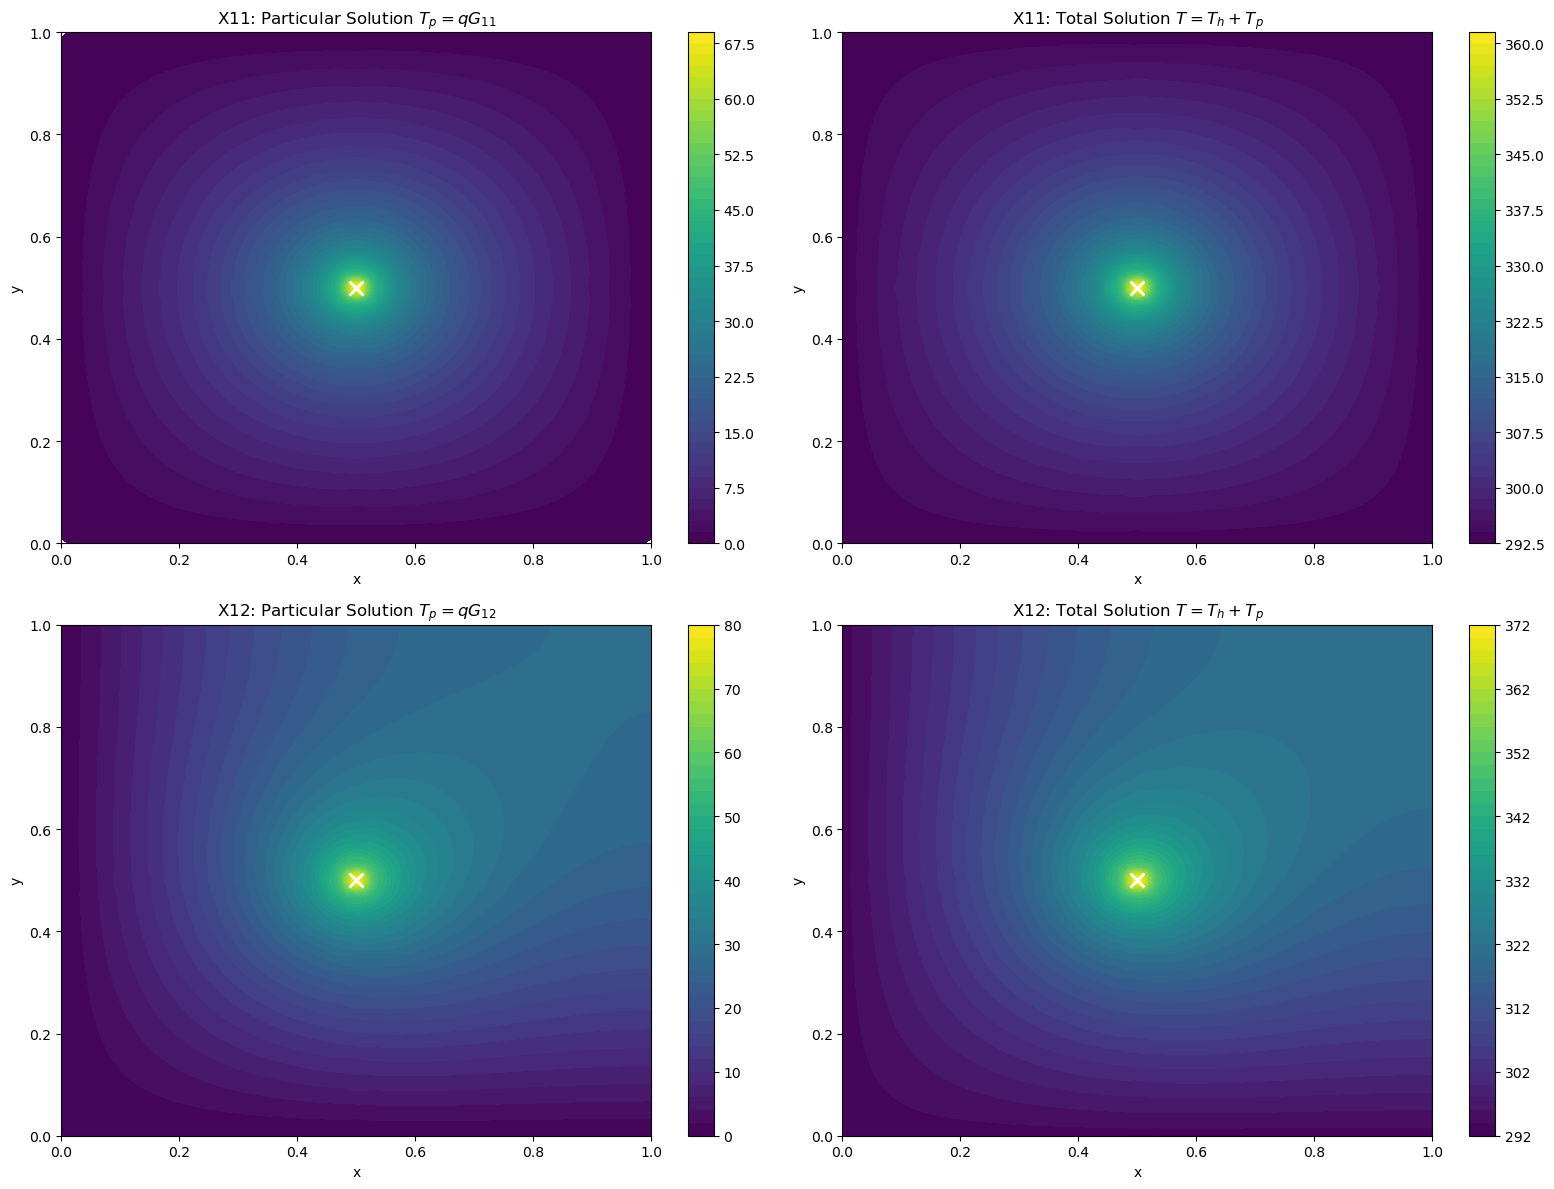

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# ------------------------------------------------------
# Domain & mesh
# ------------------------------------------------------

# Your code 
Lx, Ly = 1.0, 1.0
Nx, Ny = 100, 100

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Source location and strength
xs, ys = 0.5, 0.5
q = 100.0          
T_d = 293.0        

# ------------------------------------------------------
# Stage 3: 2D Green functions (X11 and X12), compute them using stage 3
# ------------------------------------------------------

# Particular solutions from point source
Tp11 = q * G11
Tp12 = q * G12

# ------------------------------------------------------
# Finite difference solver (homogeneous part)
# ------------------------------------------------------

# Case 1: X11 = Dirichlet–Dirichlet–Dirichlet–Dirichlet
heat1 = SteadyHeat2D(Lx, Ly, Nx, Ny)
heat1.set_south('D', T_d=T_d)
heat1.set_north('D', T_d=T_d)
heat1.set_east('D',  T_d=T_d)
heat1.set_west('D',  T_d=T_d)

T_h1 = heat1.solve()

# Case 2: X12 = Dirichlet–Neumann BC
# Example:
# South  = Dirichlet
# West   = Dirichlet
# North  = Neumann (zero flux)
# East   = Neumann (zero flux)

heat2 = SteadyHeat2D(Lx, Ly, Nx, Ny)
heat2.set_south('D', T_d=T_d)
heat2.set_west('D',  T_d=T_d)
heat2.set_north('N', q=0.0)
heat2.set_east('N',  q=0.0)

T_h2 = heat2.solve()

# ------------------------------------------------------
# Plots
# ------------------------------------------------------

T_total11 = T_h1 + Tp11
T_total12 = T_h2 + Tp12

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot X11 case

# Row 1: X11 case

im1 = axes[0, 0].contourf(X, Y, Tp11, levels=50, cmap='viridis')
axes[0, 0].plot(xs, ys, 'wx', markersize=10, markeredgewidth=2)
axes[0, 0].set_title('X11: Particular Solution $T_p = qG_{11}$', fontsize=12)
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')
plt.colorbar(im1, ax=axes[0, 0])

im2 = axes[0, 1].contourf(X, Y, T_total11, levels=50, cmap='viridis')
axes[0, 1].plot(xs, ys, 'wx', markersize=10, markeredgewidth=2)
axes[0, 1].set_title('X11: Total Solution $T = T_h + T_p$', fontsize=12)
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('y')
plt.colorbar(im2, ax=axes[0, 1])

# Row 2: X12 case

im3 = axes[1, 0].contourf(X, Y, Tp12, levels=50, cmap='viridis')
axes[1, 0].plot(xs, ys, 'wx', markersize=10, markeredgewidth=2)
axes[1, 0].set_title('X12: Particular Solution $T_p = qG_{12}$', fontsize=12)
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('y')
plt.colorbar(im3, ax=axes[1, 0])

im4 = axes[1, 1].contourf(X, Y, T_total12, levels=50, cmap='viridis')
axes[1, 1].plot(xs, ys, 'wx', markersize=10, markeredgewidth=2)
axes[1, 1].set_title('X12: Total Solution $T = T_h + T_p$', fontsize=12)
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('y')
plt.colorbar(im4, ax=axes[1, 1])

plt.tight_layout()
plt.show()
